In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\archive (10)\Loan_Data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
list(data["Education"].unique())

['Graduate', 'Not Graduate']

In [11]:
data.duplicated().sum()

0

In [12]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
len(data)

614

In [14]:
data.isnull().mean()/len(data)*100

Loan_ID              0.000000
Gender               0.003448
Married              0.000796
Dependents           0.003979
Education            0.000000
Self_Employed        0.008488
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.005836
Loan_Amount_Term     0.003714
Credit_History       0.013263
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
data.groupby('Education')["LoanAmount"].mean()

Education
Graduate        154.060215
Not Graduate    118.409449
Name: LoanAmount, dtype: float64

In [16]:
l=list(data.groupby('Education')["LoanAmount"].mean().values)

In [17]:
l

[154.06021505376344, 118.40944881889764]

#### There are some missing values

<AxesSubplot:>

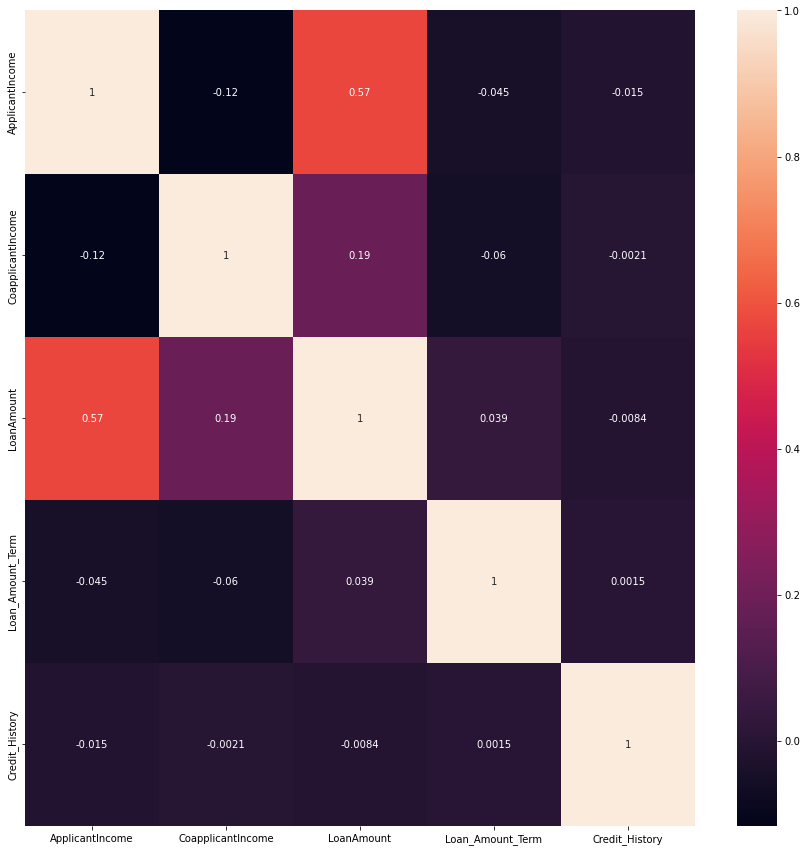

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

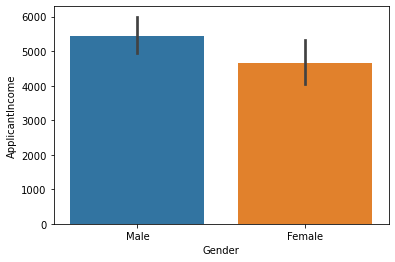

In [19]:
sns.barplot(x="Gender",y="ApplicantIncome",data=data)
plt.show()

#### Males have more income than Females

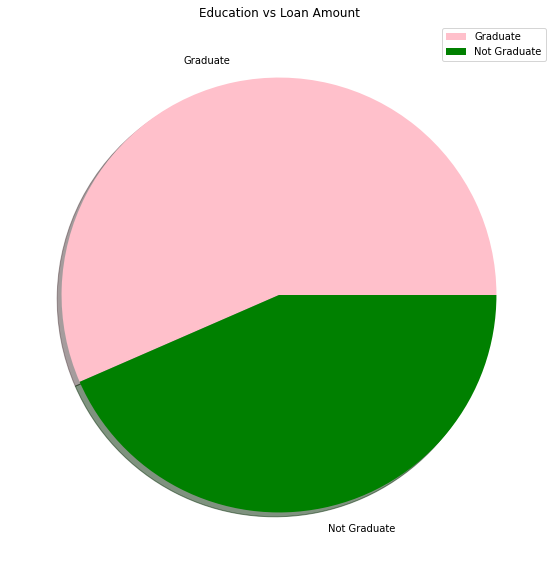

In [20]:
plt.figure(figsize=(10,10))
loan = l
plt.pie(l,labels=list(data["Education"].unique()),colors = ['pink','green'],shadow=True)
plt.legend()
plt.title("Education vs Loan Amount")
plt.show()

### Average Loan amount taken by Graduates is more then non-graduates

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

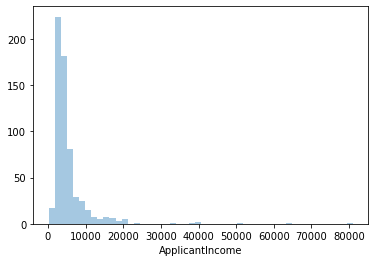

In [21]:
sns.distplot(data["ApplicantIncome"],kde=False)

<AxesSubplot:xlabel='LoanAmount'>

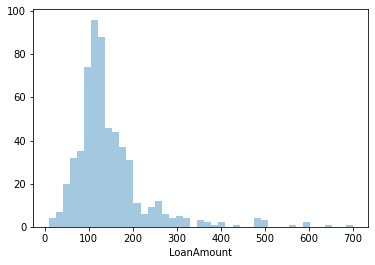

In [22]:
sns.distplot(data["LoanAmount"],kde=False)

In [23]:
data.groupby('Property_Area')["LoanAmount"].mean()

Property_Area
Rural        152.260116
Semiurban    145.504386
Urban        142.198953
Name: LoanAmount, dtype: float64

In [24]:
l=list(data.groupby('Property_Area')["LoanAmount"].mean().values)

In [25]:
l

[152.2601156069364, 145.50438596491227, 142.19895287958116]

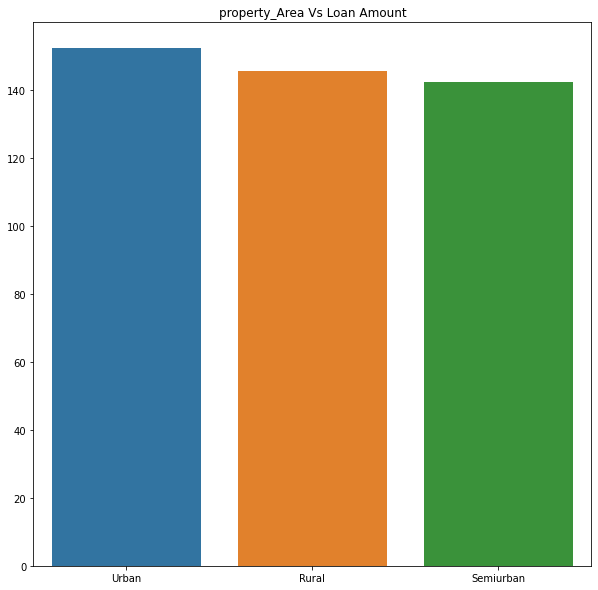

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x=data["Property_Area"].unique(),y=l)
plt.title("property_Area Vs Loan Amount")
plt.show()

### Loans are given more to the people who are having properties in urban areas compared to the properties in rural and semiurban

<AxesSubplot:xlabel='Married', ylabel='count'>

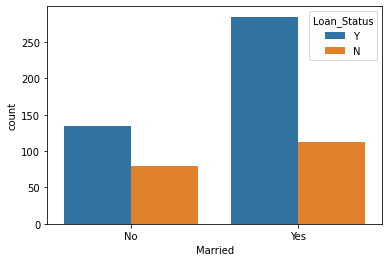

In [27]:
sns.countplot(x = 'Married', hue = 'Loan_Status',data = data)

#### People who got married are more eligible to take loan

<AxesSubplot:xlabel='Education', ylabel='count'>

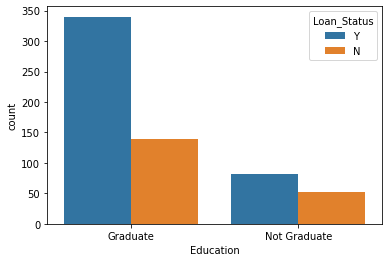

In [28]:
sns.countplot(x = 'Education', hue = 'Loan_Status',data = data)

#### Graduates have more chances to be eligible for receiving Loan 

In [29]:
f_v=data[data.columns[:-1]]
c_l=data[[data.columns[-1]]]

In [30]:
f_v.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [31]:
f_v.drop("Loan_ID",axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16312\1088286259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_v.drop("Loan_ID",axis=1,inplace=True)


In [32]:
f_v.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [33]:
c_l.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [34]:
c_l.value_counts().values

array([422, 192], dtype=int64)

In [35]:
c_l.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

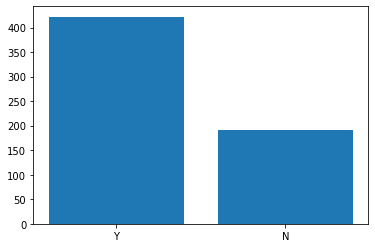

In [36]:
plt.bar(c_l["Loan_Status"].unique(),c_l.value_counts().values)
plt.show()

<AxesSubplot:>

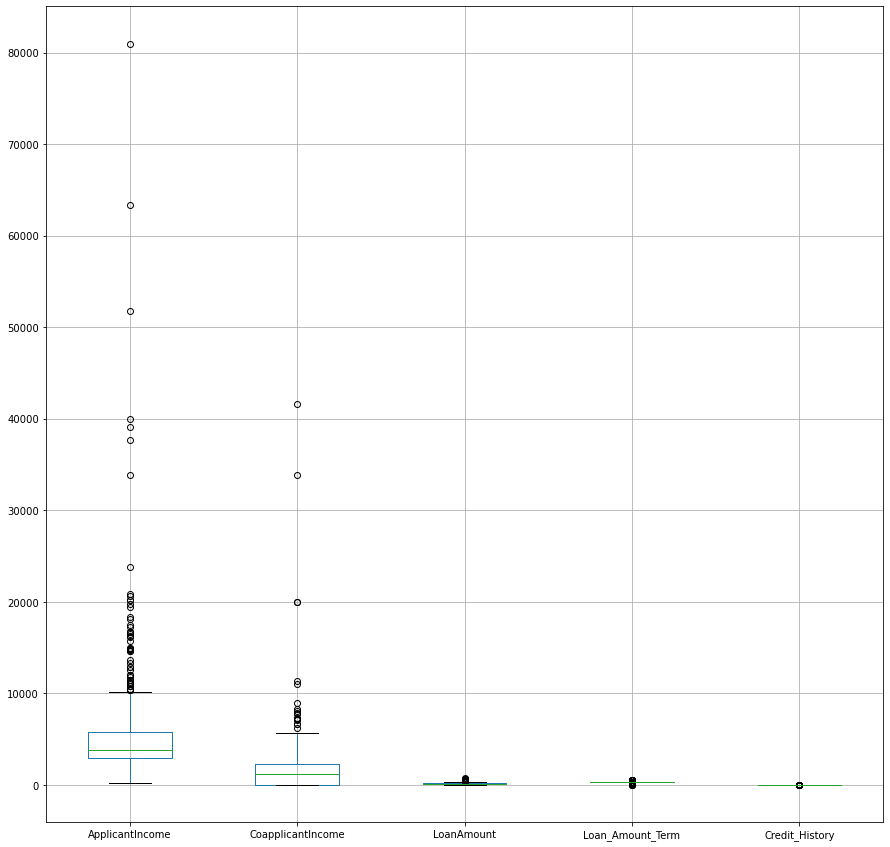

In [37]:
n=[]
o=[]
for y in f_v.columns:
    if f_v[y].dtype!="O":
        n.append(y)
    else:
        o.append(y)
plt.figure(figsize=(15,15))
f_v[n].boxplot()

In [38]:
n

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
o

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(f_v,c_l,train_size=0.8,stratify=c_l,random_state=1)

In [41]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
458,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural
361,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban
365,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural
94,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban
401,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural


In [42]:
x_train.reset_index(drop=True,inplace=True)

In [43]:
ohe=OneHotEncoder()

In [44]:
x_train[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.fit_transform(x_train[o]).toarray()).applymap(int)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,x2_3+,x2_nan,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x4_nan,x5_Rural,x5_Semiurban,x5_Urban
0,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,...,0,0,1,0,1,0,0,1,0,0
1,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,...,0,0,1,0,1,0,0,0,1,0
2,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,...,0,0,0,1,1,0,0,1,0,0
3,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,...,0,0,0,1,1,0,0,0,1,0
4,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,...,0,0,1,0,1,0,0,0,0,1
487,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,...,0,0,1,0,1,0,0,0,0,1
488,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,...,0,0,0,1,0,0,1,1,0,0
489,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,...,0,0,1,0,1,0,0,0,0,1


In [46]:
ohe.get_feature_names().tolist()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Female',
 'x0_Male',
 'x0_nan',
 'x1_No',
 'x1_Yes',
 'x1_nan',
 'x2_0',
 'x2_1',
 'x2_2',
 'x2_3+',
 'x2_nan',
 'x3_Graduate',
 'x3_Not Graduate',
 'x4_No',
 'x4_Yes',
 'x4_nan',
 'x5_Rural',
 'x5_Semiurban',
 'x5_Urban']

In [47]:
y_train.reset_index(drop=True,inplace=True)

In [48]:
y_train

,Loan_Status
0,Y
1,Y
2,N
3,Y
4,N
...,...
486,N
487,Y
488,Y
489,N


In [49]:
y_train.value_counts()/len(y_train)

Loan_Status
Y              0.686354
N              0.313646
dtype: float64

In [50]:
c_l.value_counts()/len(c_l)

Loan_Status
Y              0.687296
N              0.312704
dtype: float64

 #### Ratios are proportional

In [51]:
x_train.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     11
Credit_History       40
Property_Area         0
x0_Female             0
x0_Male               0
x0_nan                0
x1_No                 0
x1_Yes                0
x1_nan                0
x2_0                  0
x2_1                  0
x2_2                  0
x2_3+                 0
x2_nan                0
x3_Graduate           0
x3_Not Graduate       0
x4_No                 0
x4_Yes                0
x4_nan                0
x5_Rural              0
x5_Semiurban          0
x5_Urban              0
dtype: int64

In [52]:
x_train.drop(o,axis=1,inplace=True)

In [53]:
x_train_c=x_train.copy()

In [54]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_Female,x0_Male,x0_nan,x1_No,x1_Yes,...,x2_3+,x2_nan,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x4_nan,x5_Rural,x5_Semiurban,x5_Urban
0,4354,0.0,136.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,5000,3667.0,236.0,360.0,1.0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,6216,0.0,133.0,360.0,1.0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
3,3620,0.0,25.0,120.0,1.0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4,2755,0.0,65.0,300.0,1.0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0


### Missing values

In [55]:
si=SimpleImputer()

In [56]:
t_d=pd.DataFrame(si.fit_transform(x_train_c),columns=x_train.columns)

In [57]:
t_d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_Female,x0_Male,x0_nan,x1_No,x1_Yes,...,x2_3+,x2_nan,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x4_nan,x5_Rural,x5_Semiurban,x5_Urban
0,4354.0,0.0,136.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5000.0,3667.0,236.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,6216.0,0.0,133.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3620.0,0.0,25.0,120.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2755.0,0.0,65.0,300.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,3510.0,0.0,76.0,360.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
487,2297.0,1522.0,104.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
488,2550.0,2042.0,126.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
489,2400.0,1863.0,104.0,360.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
t_d.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
x0_Female            0
x0_Male              0
x0_nan               0
x1_No                0
x1_Yes               0
x1_nan               0
x2_0                 0
x2_1                 0
x2_2                 0
x2_3+                0
x2_nan               0
x3_Graduate          0
x3_Not Graduate      0
x4_No                0
x4_Yes               0
x4_nan               0
x5_Rural             0
x5_Semiurban         0
x5_Urban             0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

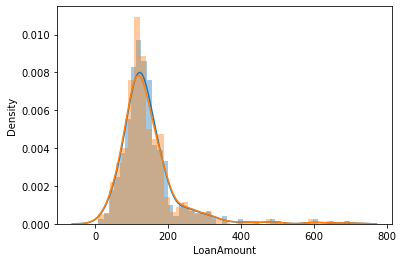

In [59]:
sns.distplot(t_d["LoanAmount"])
sns.distplot(x_train["LoanAmount"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

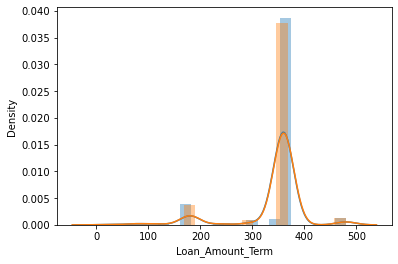

In [60]:
sns.distplot(t_d["Loan_Amount_Term"])
sns.distplot(x_train["Loan_Amount_Term"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

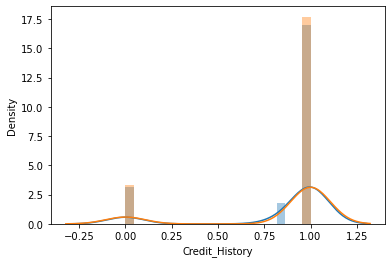

In [61]:
sns.distplot(t_d["Credit_History"])
sns.distplot(x_train["Credit_History"])

In [62]:
y_train.value_counts()

Loan_Status
Y              337
N              154
dtype: int64

#### Scaling technique

In [63]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
s=m.fit_transform(x_train)
x_train=pd.DataFrame(s)

### Balancing the labels

In [64]:
ros=RandomOverSampler(sampling_strategy=1)

In [65]:
x,y=ros.fit_resample(t_d,y_train)

In [66]:
x_train=pd.DataFrame(x)
y_train=pd.DataFrame(y)

In [67]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_Female,x0_Male,x0_nan,x1_No,x1_Yes,...,x2_3+,x2_nan,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x4_nan,x5_Rural,x5_Semiurban,x5_Urban
0,4354.0,0.0,136.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5000.0,3667.0,236.000000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,6216.0,0.0,133.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3620.0,0.0,25.000000,120.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2755.0,0.0,65.000000,300.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,5116.0,1451.0,165.000000,360.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,2400.0,3800.0,144.466102,180.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
671,2500.0,0.0,96.000000,480.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
672,3087.0,2210.0,136.000000,360.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
y_train

,Loan_Status
0,Y
1,Y
2,N
3,Y
4,N
...,...
669,N
670,N
671,N
672,N


### Detecting Outliers

In [69]:
from sklearn.neighbors import LocalOutlierFactor

In [70]:
lco=LocalOutlierFactor(contamination=0.1)

In [71]:
l=lco.fit(x_train,y_train)

In [72]:
l

LocalOutlierFactor(contamination=0.1)

In [73]:
np.where(l==-1)

(array([], dtype=int64),)

#### No Outliers

In [74]:
x_train.shape

(674, 24)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
x_test.reset_index(drop=True,inplace=True)

In [77]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban
1,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban
2,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural
3,Male,No,0,Graduate,No,2366,2531.0,136.0,360.0,1.0,Semiurban
4,Male,Yes,3+,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
118,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban
119,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban
120,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,NaN,Semiurban
121,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban


In [78]:
x_test[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.transform(x_test[o]).toarray()).applymap(int)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [79]:
x_test.drop(o,axis=1,inplace=True)

In [80]:
x_test=si.transform(x_test)

In [81]:
x_test=m.transform(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Model building

### KNN

#### Training Error

In [82]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,train_size=0.8)

In [83]:
from sklearn.metrics import accuracy_score
def kn(n):
  l=[]  
  for i in range(1,n+1):
    if (i%2!=0):
      knn =  KNeighborsClassifier(n_neighbors=i)
      model= knn.fit(x_trainf,y_trainf) 
      y_predi=model.predict(x_trainf)
      l.append(1-accuracy_score(y_trainf,y_predi))
  return l     

In [84]:
kn(10)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[0.0,
 0.16141001855287573,
 0.2411873840445269,
 0.2541743970315399,
 0.30983302411873836]

#### Cross validation Error

In [85]:
def k(n):
  l=[]  
  for i in range(1,n+1):
    if (i%2!=0):
      knn =  KNeighborsClassifier(n_neighbors=i)
      model= knn.fit(x_trainf,y_trainf) 
      y_predi=model.predict(x_cv)
      l.append(1-accuracy_score(y_cv,y_predi))
  return l      

In [86]:
k(10)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[0.31851851851851853,
 0.3851851851851852,
 0.3851851851851852,
 0.36296296296296293,
 0.40740740740740744]

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

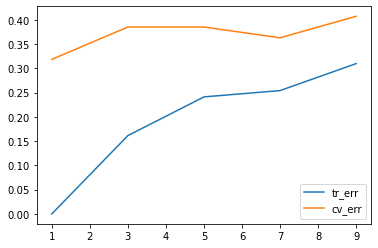

In [87]:
plt.plot([y for y in range(1,10,2)],kn(10),label="tr_err")
plt.plot([y for y in range(1,10,2)],k(10),label="cv_err")
plt.legend()
plt.show()

In [88]:
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x_trainf,y_trainf)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [89]:
predicted=model.predict(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,predicted)

0.3089430894308943

### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [93]:
x_test=pd.DataFrame(x_test)

In [94]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.029583,0.045864,0.154848,0.74359,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.145934,0.000000,0.704776,0.74359,1.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.021116,0.121511,0.083936,0.74359,0.842572,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.026686,0.060744,0.183792,0.74359,1.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.115039,0.000000,0.384949,0.74359,1.000000,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [95]:
gmodel=gnb.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
predictedg=gmodel.predict(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [97]:
accuracy_score(y_test,predictedg)

0.8292682926829268

### Logistic regression

In [98]:
import warnings 
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [99]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**2, 10**4]}]

In [100]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring ="accuracy",cv=25,verbose=2)
final_model=model.fit(x_train, y_train)
print(model.best_estimator_)
pr=final_model.predict(x_test)
accuracy_score(y_test,pr)

Fitting 25 folds for each of 4 candidates, totalling 100 fits
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ......................................

0.7642276422764228

In [101]:
m=LogisticRegression(C=10**4)

In [102]:
m.fit(x_train,y_train)

LogisticRegression(C=10000)

In [103]:
m.coef_

array([[ 1.41201859e-05, -4.03149659e-05, -1.47486448e-03,
        -5.14898859e-03,  2.50260123e+00,  1.42816316e-02,
        -4.92672213e-02, -1.75910037e-02, -2.98817130e-01,
         1.72985385e-01,  7.32551507e-02,  2.53179537e-01,
        -2.45506222e-01,  2.04540457e-01, -1.81856273e-01,
        -8.29340931e-02,  1.43569085e-01, -1.96145678e-01,
        -8.05875686e-02, -1.79792022e-01,  2.07802997e-01,
        -4.68232843e-01,  9.59465030e-01, -5.43808780e-01]])

In [104]:
final=m.fit(x_train, y_train)
pr=final.predict(x_test)
accuracy_score(y_test,pr)

0.7642276422764228